# Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = "C:/Users/guzma/OneDrive/Documents/TEC/S6/MA2007/Reto/noaa_ai_workshop/IntroNotebooks/uke_eggedal_data_challenge.pkl"
df = pd.read_pickle(file)

## Data Cleaning

In [3]:
# print(df.keys())
df1 = pd.DataFrame(df['flow'])
df1.columns = ['flow']
df2 = pd.DataFrame(df['obs_tas'])
df2.columns = ['tas_0', 'tas_1', 'tas_2', 'tas_3', 'tas_4', 'tas_5', 'tas_6', 'tas_7', 'tas_8']
df3 = pd.DataFrame(df['flow_dates'])
# df4 = pd.DataFrame(df['obs_lon_lat']) # ignore
df5 = pd.DataFrame(df['obs_pr'])
df5.columns = ['pr_0', 'pr_1', 'pr_2', 'pr_3', 'pr_4', 'pr_5', 'pr_6', 'pr_7', 'pr_8']
df6 = pd.DataFrame(df['obs_dates'])
df6.columns = ['dates']

In [30]:
df['obs_lon_lat']

[9.37, 60.23]

In [32]:
data = pd.concat([df1, df2], axis=1, join='inner')
data = pd.concat([data, df5], axis=1, join='inner')

In [33]:
data.index = df3.index

In [7]:
data['obs_dates'] = df6['dates']
data.head()

,flow,tas_0,tas_1,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7,tas_8,pr_0,pr_1,pr_2,pr_3,pr_4,pr_5,pr_6,pr_7,pr_8,obs_dates
1958-01-04,1.723781,-10.600000,-9.7,-6.7,-8.800000,-8.900000,-7.500000,-8.1,-6.5,-5.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,1958-01-04
1958-01-05,0.960882,-20.500000,-19.1,-12.0,-17.700001,-17.700001,-13.100000,-15.5,-11.8,-9.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.1,1958-01-05
1958-01-06,0.001000,-23.600000,-22.5,-15.1,-21.400000,-21.400000,-16.299999,-19.4,-14.6,-12.2,0.1,0.0,0.3,0.1,0.3,0.3,0.4,0.3,0.5,1958-01-06
1958-01-07,0.001000,-16.200001,-16.0,-14.1,-15.600000,-15.400000,-14.500000,-15.0,-13.8,-11.9,1.0,0.0,1.0,1.1,0.9,0.7,0.8,0.4,0.6,1958-01-07
1958-01-08,0.316796,-7.900000,-7.8,-9.5,-7.600000,-7.500000,-8.000000,-7.4,-8.6,-8.2,9.3,8.6,8.0,8.9,8.7,10.2,9.3,10.1,9.7,1958-01-08


In [84]:
data['obs_bool'] = data['obs_dates'] == data.index
data.head(-10)

,flow,tas_0,tas_1,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7,tas_8,...,pr_1,pr_2,pr_3,pr_4,pr_5,pr_6,pr_7,pr_8,obs_dates,obs_bool
1958-01-04,1.723781,-10.600000,-9.7,-6.7,-8.800000,-8.900000,-7.500000,-8.1,-6.5,-5.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,1958-01-04,True
1958-01-05,0.960882,-20.500000,-19.1,-12.0,-17.700001,-17.700001,-13.100000,-15.5,-11.8,-9.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.1,1958-01-05,True
1958-01-06,0.001000,-23.600000,-22.5,-15.1,-21.400000,-21.400000,-16.299999,-19.4,-14.6,-12.2,...,0.0,0.3,0.1,0.3,0.3,0.4,0.3,0.5,1958-01-06,True
1958-01-07,0.001000,-16.200001,-16.0,-14.1,-15.600000,-15.400000,-14.500000,-15.0,-13.8,-11.9,...,0.0,1.0,1.1,0.9,0.7,0.8,0.4,0.6,1958-01-07,True
1958-01-08,0.316796,-7.900000,-7.8,-9.5,-7.600000,-7.500000,-8.000000,-7.4,-8.6,-8.2,...,8.6,8.0,8.9,8.7,10.2,9.3,10.1,9.7,1958-01-08,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-12,6.737757,-4.900000,-4.2,-2.0,-3.400000,-3.500000,-2.200000,-2.7,-1.5,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,False
2016-12-13,5.645193,-10.200000,-10.1,-7.8,-9.200000,-9.300000,-7.200000,-8.0,-7.0,-6.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,False
2016-12-14,5.052036,-10.200000,-11.1,-9.6,-10.600000,-10.600000,-9.600000,-9.7,-9.1,-8.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,False
2016-12-15,5.617270,-10.800000,-11.0,-10.7,-10.600000,-10.800000,-10.100000,-10.0,-9.7,-9.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,False


## Clustering

Primero estaremos creando dos dataframes. Una tendra nuestra variable objetivo **flow** y la otra tendra las variables predictoras.

In [8]:
X = data.drop(['flow', 'obs_dates'], axis=1)
y = data['flow']

Ahora se tendra que reducir la dimension de nuestras variables predictoras. En este caso, tenemos 18 variables predictoras, lo cual nosotros reduciremos en dimensiones e intentaremos no perder mucho de la explicacion de estos datos al reducir dimensiones.

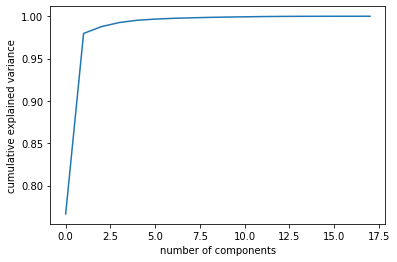

In [9]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Como podemos observar, al utilizar 2 componentes nosotros explicamos alrededor de 98% de los datos.

In [10]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(21542, 18)
(21542, 2)


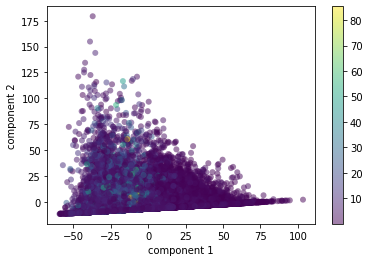

In [11]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [12]:
from sklearn.cluster import KMeans

K = 2 # Choose the number of clusters for KMeans.

# The following is common sklearn syntax. We 'fit' the KMeans model to our datset X. The variable kmeans that this
# returns then stores all of the information about KMeans for X that we are interested in.
kmeans = KMeans(n_clusters=K).fit(X)

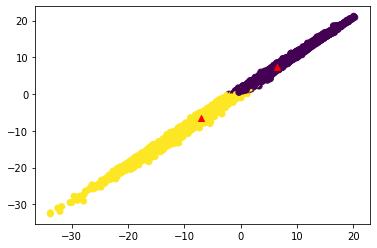

In [13]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

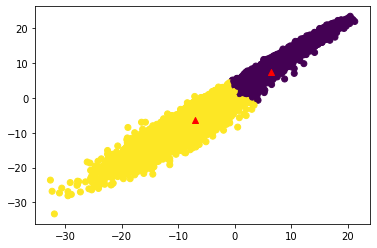

In [14]:
plt.scatter(X.iloc[:,1],X.iloc[:,2],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

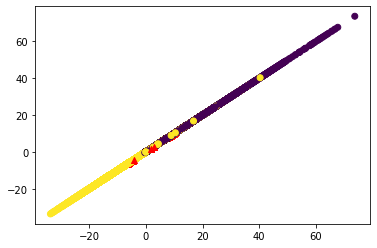

In [15]:
for i in range(len(X.columns)-1):
    plt.scatter(X.iloc[:,i+1],X.iloc[:,i+1],c = kmeans.labels_)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,i+1],centers[:,i+1],marker = '^', c = 'r')
plt.show()

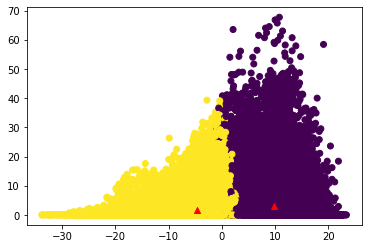

In [16]:
for i in range(8):
    plt.scatter(X.iloc[:,i],X.iloc[:,i+9],c = kmeans.labels_)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,i],centers[:,i+9],marker = '^', c = 'r')
plt.show()

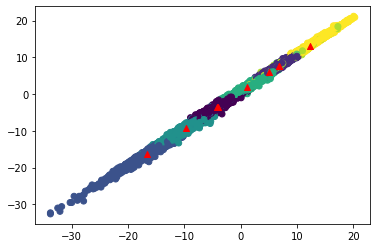

In [17]:
K = 9 # The only thing that needs to be changed

kmeans = KMeans(n_clusters=K).fit(X)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

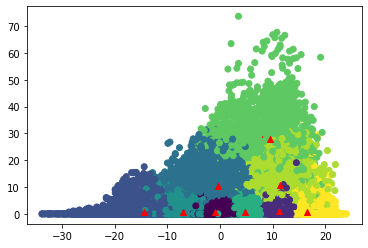

In [18]:
for i in range(9):
    plt.scatter(X.iloc[:,i],X.iloc[:,i+9],c = kmeans.labels_)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,i],centers[:,i+9],marker = '^', c = 'r')
plt.show()

## Observaciones sobre tiempo

In [19]:
Temp = X[['tas_0', 'tas_1', 'tas_2', 'tas_3', 'tas_4', 'tas_5', 'tas_6', 'tas_7',
       'tas_8']]
Pres = X[['pr_0', 'pr_1', 'pr_2', 'pr_3', 'pr_4', 'pr_5', 'pr_6', 'pr_7',
       'pr_8']]

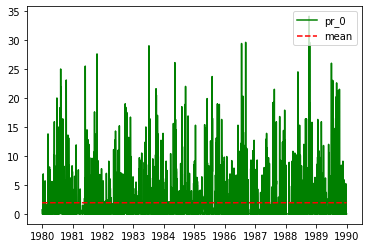

In [20]:
mean = [np.mean(Pres.iloc[(Pres.index > '1980') & (Pres.index < '1990'),0])]*len(Pres.iloc[(Pres.index > '1980') & (Pres.index < '1990')])
plt.plot(Pres.iloc[(Pres.index > '1980') & (Pres.index < '1990'),0], color='g', label='pr_0', zorder=1)
plt.plot(Pres.iloc[(Pres.index > '1980') & (Pres.index < '1990')].index,mean,linestyle ='--',color = 'r', label='mean', zorder=2)
plt.legend(loc='upper right')
plt.show()

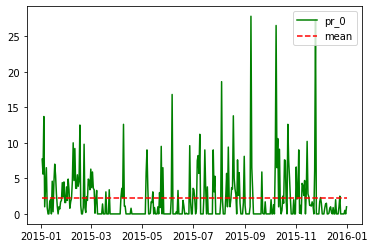

In [21]:
mean = [np.mean(Pres.iloc[(Pres.index > '2015') & (Pres.index < '2016'),0])]*len(Pres.iloc[(Pres.index > '2015') & (Pres.index < '2016')])
plt.plot(Pres.iloc[(Pres.index > '2015') & (Pres.index < '2016'),0], color='g', label='pr_0', zorder=1)
plt.plot(Pres.iloc[(Pres.index > '2015') & (Pres.index < '2016')].index,mean,linestyle ='--',color = 'r', label='mean', zorder=2)
plt.legend(loc='upper right')
plt.show()

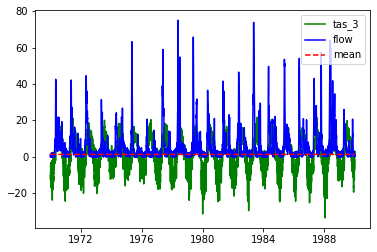

In [22]:
mean = [np.mean(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990'),3])]*len(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990')])
plt.plot(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990'),3], color='g', label='tas_3', zorder=1)
plt.plot(y.iloc[(y.index > '1970') & (y.index < '1990')], color='b', label='flow', zorder=1)
plt.plot(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990')].index,mean,linestyle ='--',color = 'r', label='mean', zorder=2)
plt.legend(loc='upper right')
plt.show()

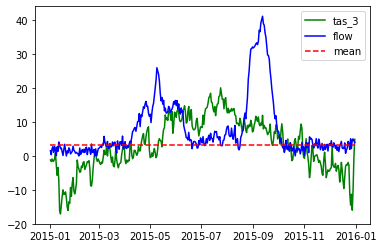

In [23]:
mean = [np.mean(Temp.iloc[(Temp.index > '2015') & (Temp.index < '2016'),3])]*len(Temp.iloc[(Temp.index > '2015') & (Temp.index < '2016')])
plt.plot(Temp.iloc[(Temp.index > '2015') & (Temp.index < '2016'),3], color='g', label='tas_3', zorder=1)
plt.plot(y.iloc[(y.index > '2015') & (y.index < '2016')], color='b', label='flow', zorder=1)
plt.plot(Temp.iloc[(Temp.index > '2015') & (Temp.index < '2016')].index,mean,linestyle ='--',color = 'r', label='mean', zorder=2)
plt.legend(loc='upper right')
plt.show()

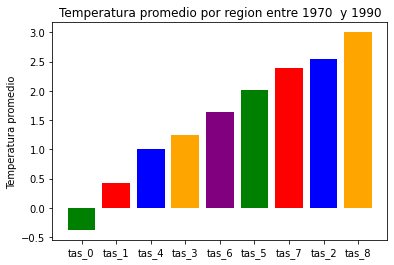

In [24]:
mean = []
for i in range(len(Temp.columns)):
    mean.append(np.mean(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990'),i]))

Temp_sorted = [x for _, x in sorted(zip(mean, Temp.columns))]
mean_sorted = sorted(mean)
plt.bar(Temp_sorted,mean_sorted,linestyle ='--', label='mean', color=['green','red','blue','orange','purple'])
plt.title("Temperatura promedio por region entre 1970  y 1990")
plt.ylabel('Temperatura promedio')
plt.show()

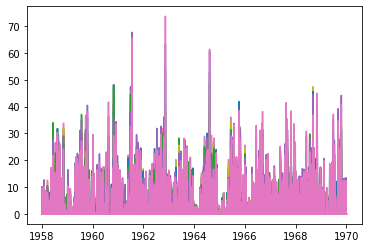

In [25]:
for i in range(len(Pres.columns)):
    # plt.plot(Pres.iloc[(Pres.index > '1970') & (Pres.index < '2010'),i], label=Pres.columns[i])
    plt.plot(Pres.iloc[(Pres.index < '1970'),i])
    plt.plot(np.mean(Pres.iloc[(Pres.index < '1970'),i]),'--')
    # plt.legend()
plt.show()

## Complejos Simpliciales

In [26]:
from sklearn.metrics import pairwise_distances

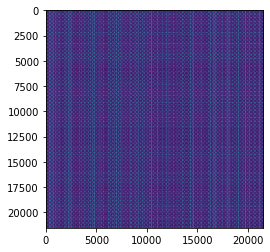

In [27]:
D = pairwise_distances(X)
plt.imshow(D)
plt.show()

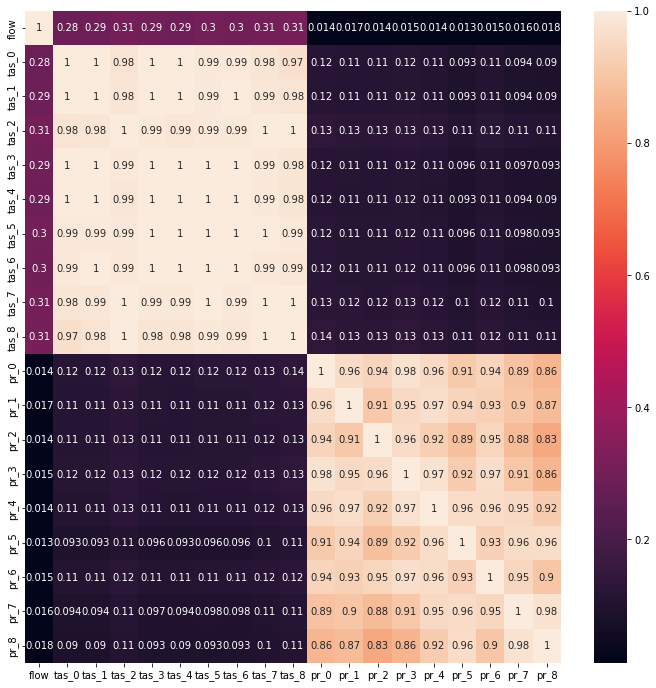

In [28]:
import seaborn as sns
plt.figure(figsize=(12, 12))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [85]:
import networkx as nx
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [86]:
def create_simplicial_complex(D,r):
    """
    Input: distance matrix and nonnegative radius
    Output: networkx graph 
    """
    
    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r) 
    G.add_edges_from(edge_list)
    
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

In [87]:
r = 1
G = create_simplicial_complex(D,r)
nx.draw_kamada_kawai(G)